# Exploratory Data Analysis (EDA)

*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

#### Downloading Stock Price Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of stocks
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

# Download historical stock price data
stock_data = yf.download(tickers, start="2015-01-01", end="2024-01-01", group_by='ticker')


[*********************100%***********************]  4 of 4 completed


## Exploratory Data Analysis (EDA)

#### Plotting Stock Price Trends Over Time

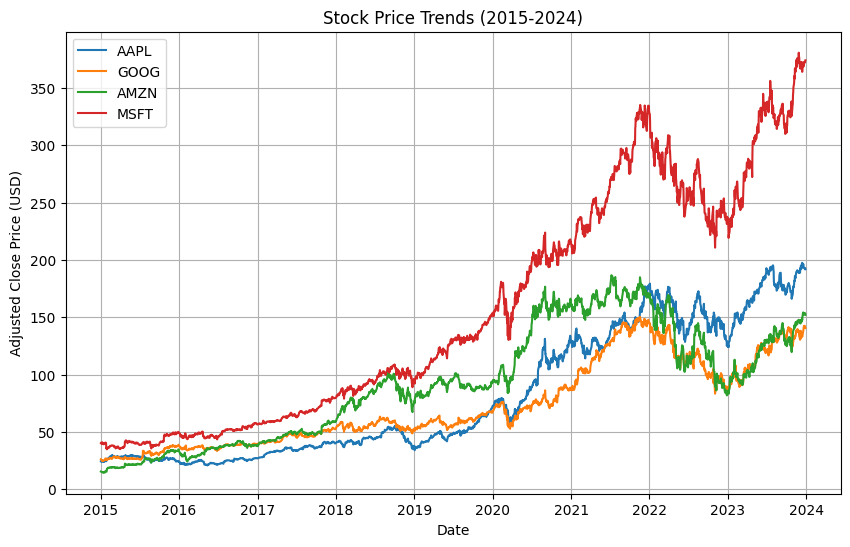

In [ ]:
# Extract the adjusted close price for each stock
adjusted_close = pd.DataFrame({ticker: stock_data[ticker]['Adj Close'] for ticker in tickers})

# Plot the stock prices
plt.figure(figsize=(10,6))
for ticker in tickers:
    plt.plot(adjusted_close.index, adjusted_close[ticker], label=ticker)

plt.title("Stock Price Trends (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


#### Calculate Daily Returns and Visualize Their Distribution

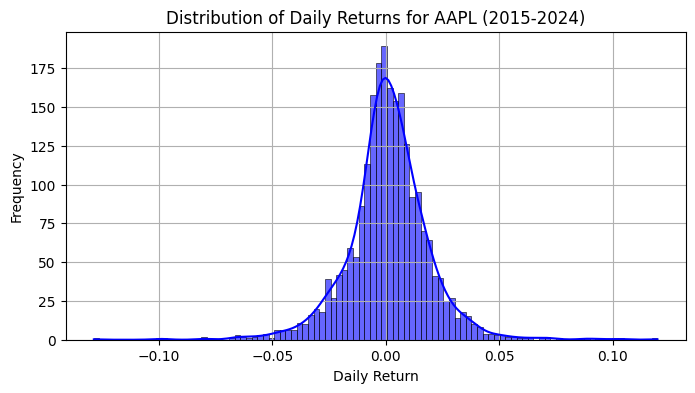

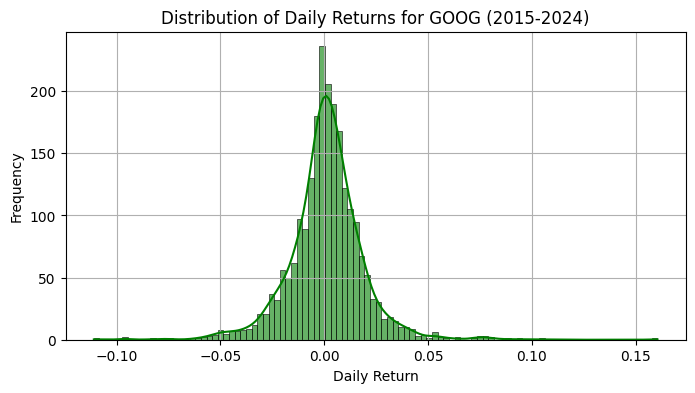

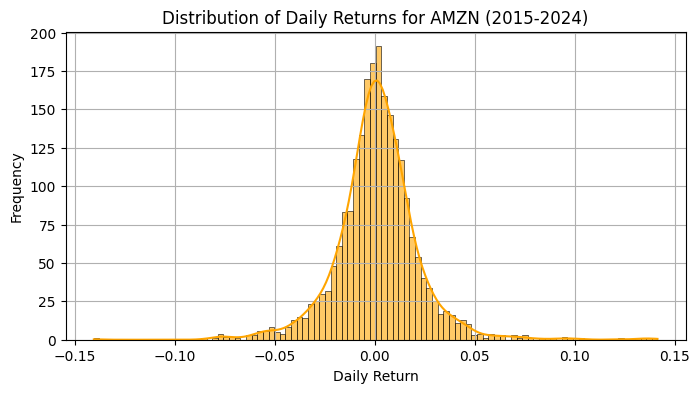

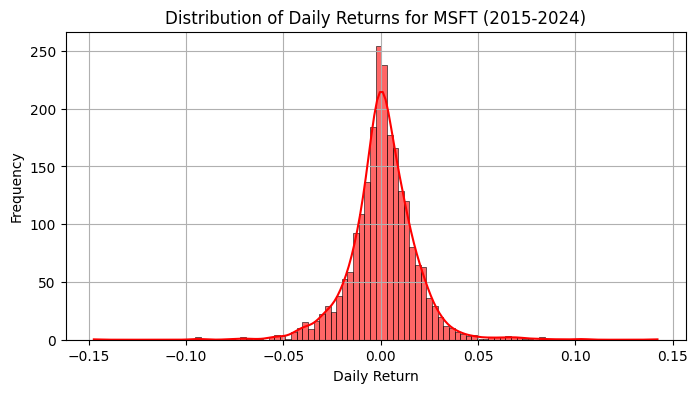

In [14]:
# Calculate daily returns
daily_returns = adjusted_close.pct_change().dropna()

# Define colors for each stock
colors = ['blue', 'green', 'orange', 'red']

# Plot the distribution of daily returns for each stock in separate graphs with distinct colors
for ticker, color in zip(tickers, colors):
    plt.figure(figsize=(8,4))
    sns.histplot(daily_returns[ticker], kde=True, bins=100, color=color, alpha=0.6)

    plt.title(f"Distribution of Daily Returns for {ticker} (2015-2024)")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()



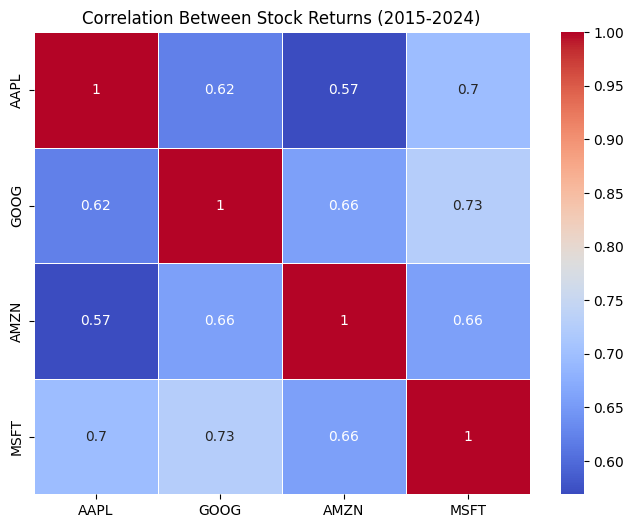

In [15]:
# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Stock Returns (2015-2024)")
plt.show()
